# Evaluating Classification Methods in Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets : make_classification

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           weights=[0.95, 0.05],
                           random_state=42)

In [3]:
X

array([[ 0.80006231, -0.95748851],
       [-0.52818373,  1.23888131],
       [ 0.15451248,  1.21751971],
       ...,
       [-2.89660952,  0.27791484],
       [-1.29970448,  2.2311113 ],
       [-0.41851668,  1.67455815]])

In [4]:
y

array([1, 0, 0, ..., 0, 0, 0])

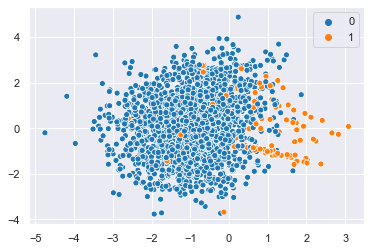

In [5]:
sns.set()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='tab10');

## X, y 

In [6]:
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'] )
y = pd.Series(y, name='target' )

In [7]:
X

,feature_1,feature_2
0,0.800062,-0.957489
1,-0.528184,1.238881
2,0.154512,1.217520
3,-1.719618,1.059892
4,-0.735827,-0.245366
...,...,...
1995,-2.580010,2.400387
1996,-1.152714,-0.125506
1997,-2.896610,0.277915
1998,-1.299704,2.231111


In [8]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: target, Length: 2000, dtype: int32

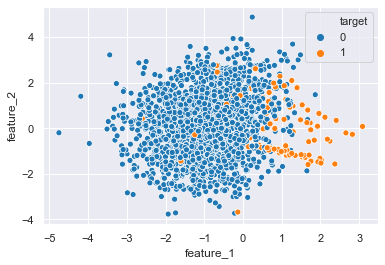

In [9]:
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='tab10');

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## .coef_ / .intercep_

In [11]:
model.coef_

array([[ 2.4144839 , -0.30307802]])

In [12]:
model.intercept_

array([-2.67299479])

Text(0, 0.5, 'feature_2')

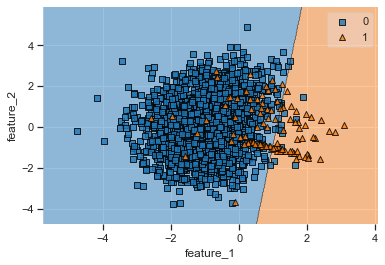

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(X), np.array(y), clf=model);

plt.xlabel('feature_1')
plt.ylabel('feature_2')

## Accuracy Score

In [14]:
model.score(X, y)

0.9635

## Hiding some part of the data (Holdout) to check a better estimate of the `.score()`

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,feature_1,feature_2
968,-1.195228,-0.680139
240,0.692116,1.801912
819,-0.023314,1.200287
692,-1.020177,1.243738
420,-1.233674,0.416807
...,...,...
1130,-2.839014,-2.908486
1294,-2.090568,0.145925
860,-1.112288,0.216818
1459,0.679685,2.706590


In [18]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Test Score

In [19]:
model.score(X_test, y_test)

0.96

In [20]:
X_test

,feature_1,feature_2
1860,2.179929,-0.478662
353,-0.480964,-0.956624
1333,-1.503589,-1.466327
905,0.950451,2.041321
1289,-1.820793,1.725700
...,...,...
965,0.929080,0.864839
1284,-0.520302,0.347225
1739,-1.417472,2.675593
261,-0.969213,0.333714


In [21]:
list(zip(model.predict(X_test), y_test))

[(1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 

### Train Score

In [22]:
model.score(X_train, y_train)

0.9625

`model.score()` measures what is called the **accuracy of the model**. 

- Accuracy: $\frac{\text{number observations I've correctly predicted}}{\text{total number of observations}}$

But wait a minute. Let me create a dumb classifier.

In [23]:
class DumbClassifier():
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return [0 for i in range(len(X))]
    
    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(self.predict(X), y)

In [24]:
dumb = DumbClassifier()

dumb.fit(X, y)
dumb.score(X, y)

0.946

Why did that happen?

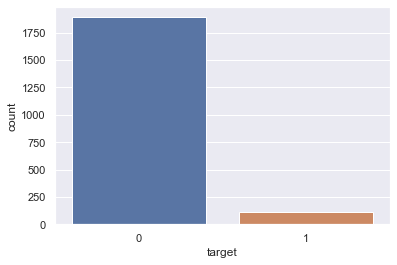

In [25]:
sns.countplot(y);

In [26]:
y.value_counts()

0    1892
1     108
Name: target, dtype: int64

In [27]:
y.value_counts(normalize=True)

0    0.946
1    0.054
Name: target, dtype: float64

So how do I know if I'm doing a good job on my model's performance?